# Introduction

We often stumble across data that is 'dirty', difficult to understand and with many patterns that hinder our analysis. This table table served as good example of how, after some cleaning done, we can extract valuable insights.

## Important notes
Since this is a study that focus on the cleaning part of the analysis, I'm skipping some crucial steps of the process, such as checking for *realiability or currency*. As we are aware, it's imperative to check if the data we are working with *ROCCCs* - it is *reliable, original, comprehensive, current and cited*, so not to gain biased insights and skewed and flawed results.






## Insights

Right off the bat, with just some cleaning and a very quick analysis, some valuable insights were gathered. Let`s see them:

| Clothing (Men / Women) and Healthcare are the Top Sellers |
| ---------------------------------------------------------- |
| These two (or three) categories of products are responsible for the most sales |

| Mean discount overall is over 30% and many products have zero cost |
| ------------------------------------------------------------------- |
| How do promotions work? Do they really engage people to buy more? |

| Sub-category number 1 of non-clothing products is *Selfie-related gadgets* |
| ------------------------------------------------------------------------ |
| Advertising in social media should be a top priority |




# Processing and Cleaning

In [1]:
library(tidyverse)
library(skimr)
library(tinytable)
library(knitr)
library(viridis)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: viridisLite



In [2]:
shopee <- read.csv ("../input/shopee-sample-data/20240121_shopee_sample_data (1).csv")

In [3]:
str(shopee)


'data.frame':	20312 obs. of  20 variables:
 $ price_ori           : num  25.8 1.41 8.5 8.7 3999 ...
 $ delivery            : chr  "KL City, Kuala Lumpur" "" "KL City, Kuala Lumpur" "" ...
 $ item_category_detail: chr  "Shopee | Women's Bags | Shoulder Bags | Shoulder Bags" "Shopee | Home Appliances | Sewing Machines | Sewing Machines and Accessories" "Shopee | Women's Bags | Handbags | Set Handbags" "Shopee | Women Clothes | Maternity Wear | Innerwear" ...
 $ specification       : chr  "Product Specifications Category Shopee Women's Bags Shoulder Bags Shoulder Bags Bag Style Boston Material Leath"| __truncated__ "Product Specifications Category Shopee Home Appliances Sewing Machines Sewing Machines and Accessories Stock 31"| __truncated__ "Product Specifications Category Shopee Women's Bags Handbags Set Handbags Bag Style Chain Bag Set Yes Stock 204"| __truncated__ "Product Specifications Category Shopee Women Clothes Maternity Wear Innerwear Pattern Plain Bra Style Others Ma"| __trunc

## Separate categories to facilitate the analysis

Besides the products, it's crucial to check what categories they belong to and analyse them individually. This contributes to a better understanding of the **product mix** and what to tackle when creating **marketing campaigns and stocking.**

In [4]:
# Divide the categories for further analysis

shopee_cat <- shopee %>%
    separate(item_category_detail, into = c("cat1", "cat2", "cat3", "cat4"), sep = "\\|", fill = "right") %>%
    separate(delivery, into = c("city", "country"), sep = "\\,", fill = "right")

## Checking data types

Item ratings: Some contained the phrase "*No ratings yet*" - fine for NAs
Total ratings: Contained some numbers with *'k'* in the end

In [5]:
# Convert the columns to numeric; Remove other characters except '.'; Multiply 'k' by 1000

shopee_fin <- shopee_cat %>%
  mutate(across(c(price_ori, item_rating, price_actual, total_rating, total_sold), 
                ~ as.numeric(ifelse(grepl("k", ., ignore.case = TRUE),  
                                    as.numeric(gsub("[^0-9.]", "", .)) * 1000,  
                                    as.numeric(gsub("[^0-9.]", "", .))))))

## Dealing with "blanks" and  *nulls*

In [6]:
# Show the columns with blank (not NA) values
print(as.list(colSums(shopee_fin == "", na.rm = TRUE)[colSums(shopee_fin == "", na.rm = TRUE) > 0]))



$city
[1] 13754



In [7]:
# Convert all the blank values to NA
shopee_fin[shopee_fin == ""] <- NA

In [8]:
# Date to date type
shopee_fin$w_date <- as.Date(shopee_fin$w_date, format = "%Y-%m-%d")

## Taking a look at the table after all the cleaning

Table is clean and ready to extract KPIs and insights

In [9]:
shopee_fin %>%
    select (-specification, -title, -sitename, -link_ori, -idHash, -id, -idElastic, -pict_link, -seller_name, -timestamp, -desc, -favorite) %>%
    sample_n(15)

price_ori,city,country,cat1,cat2,cat3,cat4,w_date,item_rating,price_actual,total_rating,total_sold
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
198.00,KL City,Kuala Lumpur,Shopee,Baby & Toys,Kids Health & Skincare,"Moisturizers, Creams & Ointments",2023-05-13,4.8,188.00,30,30
36.00,NA,NA,Shopee,Health & Beauty,Pedicure & Manicure,Treatment & Remover,2023-05-01,4.9,18.53,181,181
3.00,NA,NA,Shopee,Baby & Toys,Toys & Education,Kids Puzzles,2023-04-26,4.9,0.74,1400,1400
NA,KL City,Kuala Lumpur,Shopee,Health & Beauty,Personal Care,Adult Diapers,2023-05-05,4.9,135.99,2400,2400
50.00,KL City,Kuala Lumpur,Shopee,Baby & Toys,Girls Fashion,Girl Pajamas,2023-05-01,4.9,11.45,9100,9100
0.20,KL City,Kuala Lumpur,Shopee,Health & Beauty,Bath & Body,Body Lotion & Others,2023-05-12,4.9,0.20,594,594
999.00,KL City,Kuala Lumpur,Shopee,Health & Beauty,Personal Care,Adult Diapers,2023-05-05,4.9,999.00,446,446
7938.46,NA,NA,Shopee,Watches,Others,NA,2023-05-05,NA,3969.23,0,0
3.89,NA,NA,Shopee,Men Clothes,T-shirts & Singlets,Others,2023-04-28,4.9,3.89,847,847


# Analysis

### Summaries


In [10]:
options(scipen = 999)

nums <- c("price_ori", "item_rating", "price_actual", "total_rating", "total_sold")

#Filter prices with more than 5 digits
summary_list <- lapply(nums, function(var) {
  if (var %in% c("price_ori", "price_actual")) {
    valores_filtrados <- shopee_fin[[var]][shopee_fin[[var]] < 99999] 
  } else {
    valores_filtrados <- shopee_fin[[var]]
  }
# Apply summary
  resumo <- summary(valores_filtrados)
  
# Creates a dataframe with the results
  data.frame(
    Estatística = var, 
    Métrica = names(resumo), 
    Valor = as.character(resumo),  # Converts to strings to avoid problemas with NA
    stringsAsFactors = FALSE
  )
})

# Combine the results in one table
summary_table <- bind_rows(summary_list)

# Exhibit formated table
kable(summary_table, col.names = c("Topic", "Metric", "Value"))

#KPIs display





|Topic        |Metric  |Value            |
|:------------|:-------|:----------------|
|price_ori    |Min.    |0                |
|price_ori    |1st Qu. |2.2575           |
|price_ori    |Median  |19.9             |
|price_ori    |Mean    |304.406872014331 |
|price_ori    |3rd Qu. |89.9             |
|price_ori    |Max.    |99500            |
|price_ori    |NA's    |200              |
|item_rating  |Min.    |1                |
|item_rating  |1st Qu. |4.9              |
|item_rating  |Median  |4.9              |
|item_rating  |Mean    |4.88978023111845 |
|item_rating  |3rd Qu. |5                |
|item_rating  |Max.    |5                |
|item_rating  |NA's    |928              |
|price_actual |Min.    |0                |
|price_actual |1st Qu. |1                |
|price_actual |Median  |10               |
|price_actual |Mean    |252.70175780287  |
|price_actual |3rd Qu. |69               |
|price_actual |Max.    |99500            |
|price_actual |NA's    |15               |
|total_ra

### Mean price and discounts

In [11]:
# KPIs

# Average product price for the whole database

# Many products were being sold with 100% discount

no_na <- !is.na(shopee_fin$price_ori) & !is.na(shopee_fin$total_sold) & !is.na(shopee_fin$price_actual) & shopee_fin$price_ori <= 99999 & shopee_fin$price_actual > 0 
w_price <- weighted.mean(shopee$price_ori[no_na], shopee_fin$total_sold[no_na])
discount <- (shopee_fin$price_ori[no_na] - shopee_fin$price_actual[no_na]) / shopee_fin$price_ori[no_na]
w_discount <- weighted.mean(discount, shopee_fin$total_sold[no_na])

data.frame(
    KPI = c("Mean Price", "Mean Discount (%)"),
    Value = c(w_price, w_discount*100)
)

KPI,Value
<chr>,<dbl>
Mean Price,65.97746
Mean Discount (%),37.51614


In [12]:
unique(shopee_fin$cat2)


[1] " Women's Bags "           " Home Appliances "       
 [3] " Women Clothes "          " Cameras & Drones "      
 [5] " Others "                 " Mobile & Accessories "  
 [7] " Men Clothes "            " Men's Bags & Wallets "  
 [9] " Watches "                " Health & Beauty "       
[11] " Baby & Toys "            " Home & Living "         
[13] " Groceries & Pets "       " Fashion Accessories "   
[15] " Men Shoes "              " Computer & Accessories "
[17] " Games, Books & Hobbies " " Tickets & Vouchers "    
[19] " Automotive "             " Women Shoes "           
[21] " Sports & Outdoor "       " Muslim Fashion "        
[23] " Travel & Luggage "       " Gaming & Consoles "

### Visualize the best selling categories

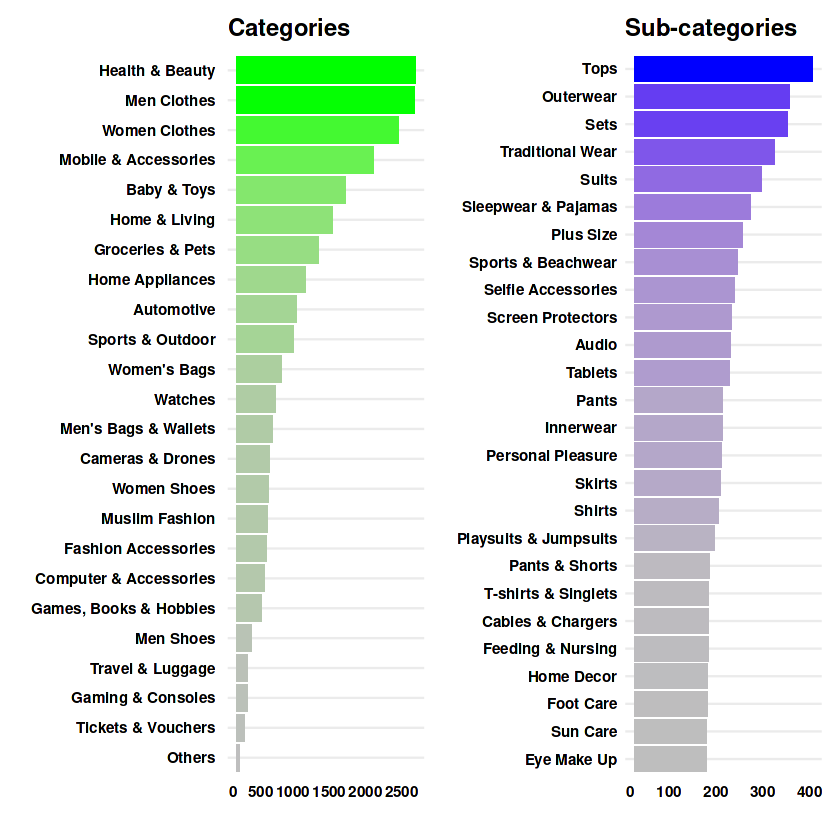

In [13]:
p1 <- ggplot(shopee_fin, aes(x = reorder(cat2, table(cat2)[cat2]), fill = after_stat(count))) +
  geom_bar() +
  coord_flip() +
  scale_fill_gradient(low = "grey", high = "green") +
  labs(x = "", y = "", title = "Categories") +
  theme_minimal() + 
  theme(
    legend.position = "none",
    axis.text.x = element_text(vjust = 0.5, hjust = 1, color = "black", face = "bold"),
    axis.text.y = element_text(vjust = 0.5, hjust = 1, color = "black", face = "bold"),    
    plot.title = element_text(face = "bold", size = 14),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank()
  )

shopee_filtrado <- shopee_fin %>%
  mutate(cat3 = trimws(cat3)) %>%
  filter(cat3 != "Others") %>%
  group_by(cat3) %>%
  filter(n() > 150) %>%
  ungroup() %>%
  mutate(cat3 = as.character(cat3))

p2 <- ggplot(shopee_filtrado, aes(x = reorder(cat3, table(cat3)[cat3]), fill = after_stat(count))) +
  geom_bar() +
  coord_flip() +
  scale_fill_gradient(low = "grey", high = "blue") +
  labs(x = "", y = "", title = "Sub-categories") +
  theme_minimal() + 
  theme(
    legend.position = "none",
    axis.text.x = element_text(vjust = 0.5, hjust = 1, color = "black", face = "bold"),
    axis.text.y = element_text(vjust = 0.5, hjust = 1, color = "black", face = "bold"),    
    plot.title = element_text(face = "bold", size = 14),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank()
  )
p1 + p2

### Visualization of the best-selling non-clothing/health category of products

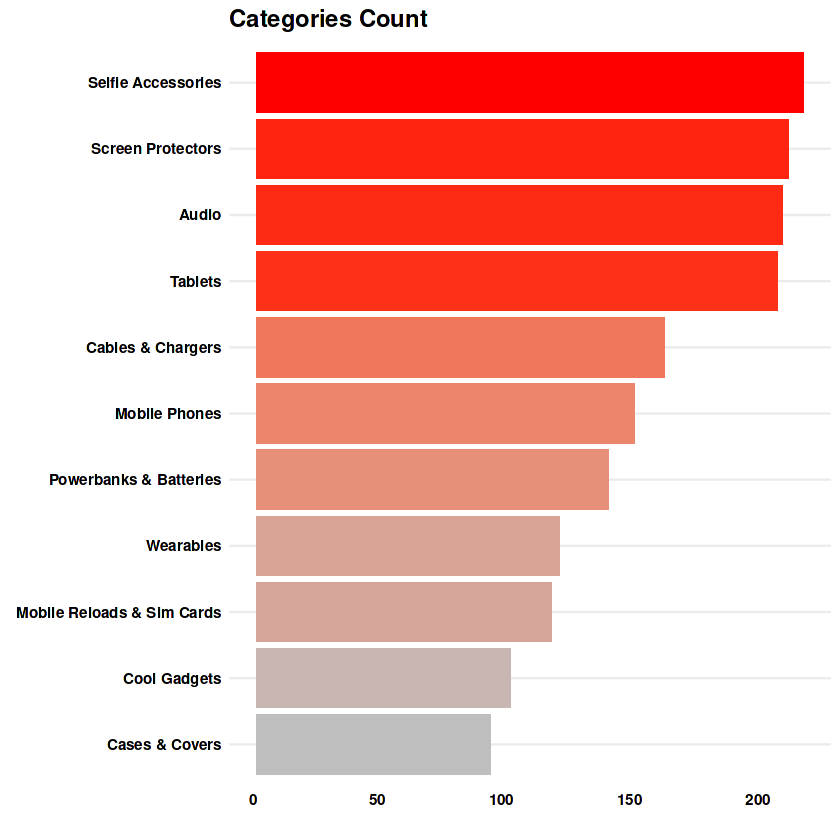

In [14]:
shopee_filtrado <- shopee_fin %>%
  filter(cat2 == " Mobile & Accessories ") %>%
  mutate(cat3 = trimws(cat3)) %>% # Used to filter que "Others" category
  filter(cat3 != "Others") %>%
  group_by(cat3) %>%
  mutate(cat3 = as.character(cat3))

ggplot(shopee_filtrado, aes(x = reorder(cat3, table(cat3)[cat3]), fill = after_stat(count))) +
  geom_bar() +
  coord_flip() +
  scale_fill_gradient(low = "grey", high = "red") +
  labs(x = "", y = "", title = "Categories Count") +
  theme_minimal() + 
  theme(
    legend.position = "none",
    axis.text.x = element_text(vjust = 0.5, hjust = 1, color = "black", face = "bold"),
    axis.text.y = element_text(vjust = 0.5, hjust = 1, color = "black", face = "bold"),    
    plot.title = element_text(face = "bold", size = 14),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank()
  )